In this file we have 

performance plot for $\lambda$ (0.1,0.9), (0.2,0.8), (0.3,0.7), (0.4,0.6), and 0.5 (Fixed lambda)
- 1. Data-Limited (DL) Clients
- 2. Data-Rich (DR) Clients

Convergence plot for $\lambda$ (0.1,0.9), (0.2,0.8), (0.3,0.7), (0.4,0.6), and 0.5 (Fixed lambda)

 - 1. Data-Limited (DL) Clients
- 2. Data-Rich (DR) Clients


In [1]:
import os
import json
import matplotlib.pyplot as plt

test_cfeddc_l_01 = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/CFedDC_KT_RL_lambda_min_0.1_lambda_max_0.9_kappa_1.0_delta_1.0_100/local_test'
test_cfeddc_l_02 = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/CFedDC_KT_RL_lambda_min_0.2_lambda_max_0.8_kappa_1.0_delta_1.0_100/local_test'
test_cfeddc_l_03 = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/CFedDC_KT_RL_lambda_min_0.3_lambda_max_0.7_kappa_1.0_delta_1.0_100/local_test'
test_cfeddc_l_04 = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/CFedDC_KT_RL_lambda_min_0.4_lambda_max_0.6_kappa_1.0_delta_1.0_100/local_test'
test_cfeddc_l_05 = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/CFedDC_KT_RL_lambda_min_0.5_lambda_max_0.5_kappa_1.0_delta_1.0_100/local_test'
test_cfeddc_l_06 = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/CFedDC_KT_RL_no_lambda_kappa_1.0_delta_1.0/local_test'

output_dir = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/all_mae'  # Folder to save individual plots
os.makedirs(output_dir, exist_ok=True)

# File lists
cfeddc_files_01 = sorted([f for f in os.listdir(test_cfeddc_l_01) if f.endswith('.json')])
cfeddc_files_02 = sorted([f for f in os.listdir(test_cfeddc_l_02) if f.endswith('.json')])
cfeddc_files_03 = sorted([f for f in os.listdir(test_cfeddc_l_03) if f.endswith('.json')])
cfeddc_files_04 = sorted([f for f in os.listdir(test_cfeddc_l_04) if f.endswith('.json')])
cfeddc_files_05 = sorted([f for f in os.listdir(test_cfeddc_l_05) if f.endswith('.json')])
cfeddc_files_06 = sorted([f for f in os.listdir(test_cfeddc_l_06) if f.endswith('.json')])

# Stats containers
resourceless_cmae_cfeddc_01 = []
resourceful_cmae_cfeddc_01 = []
resourceless_cmae_cfeddc_02 = []
resourceful_cmae_cfeddc_02 = []
resourceless_cmae_cfeddc_03 = []
resourceful_cmae_cfeddc_03 = []
resourceless_cmae_cfeddc_04 = []
resourceful_cmae_cfeddc_04 = []
resourceless_cmae_cfeddc_05 = []
resourceful_cmae_cfeddc_05 = []
resourceless_cmae_cfeddc_06 = []
resourceful_cmae_cfeddc_06 = []

all_cmae_cfeddc_01 = []
all_cmae_cfeddc_02 = []
all_cmae_cfeddc_03 = []
all_cmae_cfeddc_04 = []
all_cmae_cfeddc_05 = []
all_cmae_cfeddc_06 = []

for file_name in cfeddc_files_01:
    
    cfeddc_path_01 = os.path.join(test_cfeddc_l_01, file_name)
    cfeddc_path_02 = os.path.join(test_cfeddc_l_02, file_name)
    cfeddc_path_03 = os.path.join(test_cfeddc_l_03, file_name)
    cfeddc_path_04 = os.path.join(test_cfeddc_l_04, file_name)       
    cfeddc_path_05 = os.path.join(test_cfeddc_l_05, file_name)
    cfeddc_path_06 = os.path.join(test_cfeddc_l_06, file_name)

    try:
        with open(cfeddc_path_01, 'r') as f1, open(cfeddc_path_02, 'r') as f2, open(cfeddc_path_03, 'r') as f3, open(cfeddc_path_04, 'r') as f4, open(cfeddc_path_05, 'r') as f5, open(cfeddc_path_06, 'r') as f6:
            data_cfeddc_01 = json.load(f1)
            data_cfeddc_02 = json.load(f2)
            data_cfeddc_03 = json.load(f3)
            data_cfeddc_04 = json.load(f4)
            data_cfeddc_05 = json.load(f5)
            data_cfeddc_06 = json.load(f6)
            
            

            user_id = data_cfeddc_01.get("user_id", file_name.split("_")[1])
            resource_category = data_cfeddc_01.get("resource_category", "Unknown")
            
            cmae_cfeddc_01 = data_cfeddc_01.get("validation_results", {}).get("info_cmae", [])
            cmae_cfeddc_02 = data_cfeddc_02.get("validation_results", {}).get("info_cmae", [])
            cmae_cfeddc_03 = data_cfeddc_03.get("validation_results", {}).get("info_cmae", [])
            cmae_cfeddc_04 = data_cfeddc_04.get("validation_results", {}).get("info_cmae", [])
            cmae_cfeddc_05 = data_cfeddc_05.get("validation_results", {}).get("info_cmae", [])
            cmae_cfeddc_06 = data_cfeddc_06.get("validation_results", {}).get("info_cmae", [])


            # print(f"Processing user {user_id} ({resource_category})...")

            
            cmae_cfeddc_01_val = min(cmae_cfeddc_01[:30])
            cmae_cfeddc_02_val = min(cmae_cfeddc_02[:30])
            cmae_cfeddc_03_val = min(cmae_cfeddc_03[:30])
            cmae_cfeddc_04_val = min(cmae_cfeddc_04[:30])
            cmae_cfeddc_05_val = min(cmae_cfeddc_05[:30])
            cmae_cfeddc_06_val = min(cmae_cfeddc_06[:30])

            all_cmae_cfeddc_01.append(cmae_cfeddc_01_val)
            all_cmae_cfeddc_02.append(cmae_cfeddc_02_val)
            all_cmae_cfeddc_03.append(cmae_cfeddc_03_val)
            all_cmae_cfeddc_04.append(cmae_cfeddc_04_val)
            all_cmae_cfeddc_05.append(cmae_cfeddc_05_val)
            all_cmae_cfeddc_06.append(cmae_cfeddc_06_val)

            # Save MAE for statistics
            if resource_category.lower() == "resourceless user":
                resourceless_cmae_cfeddc_01.append(cmae_cfeddc_01_val)
                resourceless_cmae_cfeddc_02.append(cmae_cfeddc_02_val)
                resourceless_cmae_cfeddc_03.append(cmae_cfeddc_03_val)
                resourceless_cmae_cfeddc_04.append(cmae_cfeddc_04_val)
                resourceless_cmae_cfeddc_05.append(cmae_cfeddc_05_val)
                resourceless_cmae_cfeddc_06.append(cmae_cfeddc_06_val)

                
            elif resource_category.lower() == "resourceful user":
                resourceful_cmae_cfeddc_01.append(cmae_cfeddc_01_val)
                resourceful_cmae_cfeddc_02.append(cmae_cfeddc_02_val)
                resourceful_cmae_cfeddc_03.append(cmae_cfeddc_03_val)
                resourceful_cmae_cfeddc_04.append(cmae_cfeddc_04_val)
                resourceful_cmae_cfeddc_05.append(cmae_cfeddc_05_val)
                resourceful_cmae_cfeddc_06.append(cmae_cfeddc_06_val)

                
    except Exception as e:
        print(f"Error processing {file_name}: {e}")

print("Resourceless CMAE Cfeddc_01:", resourceless_cmae_cfeddc_01)
print("Resourceless CMAE Cfeddc_02:", resourceless_cmae_cfeddc_02)
print("Resourceless CMAE Cfeddc_03:", resourceless_cmae_cfeddc_03)
print("Resourceless CMAE Cfeddc_04:", resourceless_cmae_cfeddc_04)
print("Resourceless CMAE Cfeddc_05:", resourceless_cmae_cfeddc_05)
print("Resourceless CMAE Cfeddc_06:", resourceless_cmae_cfeddc_06)



print(f"Resourceful {len(resourceful_cmae_cfeddc_01)} CMAE Cfeddc_01: {resourceful_cmae_cfeddc_01}")
print(f"Resourceful {len(resourceful_cmae_cfeddc_02)} CMAE Cfeddc_02: {resourceful_cmae_cfeddc_02}")
print(f"Resourceful {len(resourceful_cmae_cfeddc_03)} CMAE Cfeddc_03: {resourceful_cmae_cfeddc_03}")
print(f"Resourceful {len(resourceful_cmae_cfeddc_04)} CMAE Cfeddc_04: {resourceful_cmae_cfeddc_04}")
print(f"Resourceful {len(resourceful_cmae_cfeddc_05)} CMAE Cfeddc_05: {resourceful_cmae_cfeddc_05}") 
print(f"Resourceful {len(resourceful_cmae_cfeddc_06)} CMAE Cfeddc_06: {resourceful_cmae_cfeddc_06}")



print(f"All {len(all_cmae_cfeddc_01)} CMAE Cfeddc_01:, {all_cmae_cfeddc_01}")
print(f"All {len(all_cmae_cfeddc_02)} CMAE Cfeddc_02:, {all_cmae_cfeddc_02}")
print(f"All {len(all_cmae_cfeddc_03)} CMAE Cfeddc_03:, {all_cmae_cfeddc_03}")
print(f"All {len(all_cmae_cfeddc_04)} CMAE Cfeddc_04:, {all_cmae_cfeddc_04}")
print(f"All {len(all_cmae_cfeddc_05)} CMAE Cfeddc_05:, {all_cmae_cfeddc_05}")
print(f"All {len(all_cmae_cfeddc_06)} CMAE Cfeddc_06:, {all_cmae_cfeddc_06}")

Resourceless CMAE Cfeddc_01: [0.016748905181884766, 1.9997971057891846, 0.18041777610778809, 0.0, 0.07054758071899414, 0.9999648854136467, 0.13000822067260742, 0.43575382232666016, 1.499800980091095, 1.0, 0.0, 1.0, 0.021737337112426758, 1.0, 0.7878315448760986, 0.11310386657714844, 1.699583371480306, 1.4999845623970032, 0.5, 0.999626874923706, 0.9144442081451416, 0.0395359992980957, 0.07465791702270508, 0.06409406661987305, 0.9993863105773926, 0.2406930923461914, 0.026090621948242188, 1.3458585739135742, 0.49927961826324463, 1.0, 2.0, 0.002685546875, 0.9999973773956299, 0.07701969146728516, 0.499979630112648, 2.497777998447418, 0.5, 0.0, 0.497434139251709, 2.0, 1.0, 0.1059725284576416, 1.0232656002044678, 0.6683660348256429, 0.022090911865234375, 0.37482452392578125, 0.5, 0.5, 0.14416873455047607, 0.0024323463439941406, 0.15583133697509766, 1.5, 0.058837890625, 1.0, 2.4999825954437256, 0.018847942352294922, 0.4997444947560628, 0.5, 0.03660297393798828, 1.1580078601837158, 1.68552287419

In [2]:
import numpy as np

# After processing all files, print statistics
def compute_and_print_stats(mae_list, category_name):
    count = len(mae_list)
    if count > 0:
        avg_mae = sum(mae_list) / count
        std_mae = np.std(mae_list)
    else:
        avg_mae = float('nan')
        std_mae = float('nan')
    
    print(f"Category: {category_name}")
    print(f"  Number of users: {count}")
    print(f"  Average info_cmae (Std Dev): {avg_mae:.4f} ({std_mae:.4f})\n")

print("\n=== Resource Category Statistics CFeddC lambda 01,09 ===\n")
compute_and_print_stats(resourceless_cmae_cfeddc_01, "resourceless user")
compute_and_print_stats(resourceful_cmae_cfeddc_01, "resourceful user")
compute_and_print_stats(all_cmae_cfeddc_01, "all users")

print("\n=== Resource Category Statistics CFeddC lambda 02,08 ===\n")
compute_and_print_stats(resourceless_cmae_cfeddc_02, "resourceless user")
compute_and_print_stats(resourceful_cmae_cfeddc_02, "resourceful user")
compute_and_print_stats(all_cmae_cfeddc_02, "all users")

print("\n=== Resource Category Statistics CFeddC lambda 03,07 ===\n")
compute_and_print_stats(resourceless_cmae_cfeddc_03, "resourceless user")
compute_and_print_stats(resourceful_cmae_cfeddc_03, "resourceful user")
compute_and_print_stats(all_cmae_cfeddc_03, "all users")

print("\n=== Resource Category Statistics CFeddC lambda 04,06 ===\n")
compute_and_print_stats(resourceless_cmae_cfeddc_04, "resourceless user")
compute_and_print_stats(resourceful_cmae_cfeddc_04, "resourceful user")
compute_and_print_stats(all_cmae_cfeddc_04, "all users")

print("\n=== Resource Category Statistics CFeddC lambda 05,05 ===\n")
compute_and_print_stats(resourceless_cmae_cfeddc_05, "resourceless user")
compute_and_print_stats(resourceful_cmae_cfeddc_05, "resourceful user")
compute_and_print_stats(all_cmae_cfeddc_05, "all users")


print("\n=== Resource Category Statistics CFeddC no lambda ===\n")
compute_and_print_stats(resourceless_cmae_cfeddc_06, "resourceless user")
compute_and_print_stats(resourceful_cmae_cfeddc_06, "resourceful user")
compute_and_print_stats(all_cmae_cfeddc_06, "all users")






=== Resource Category Statistics CFeddC lambda 01,09 ===

Category: resourceless user
  Number of users: 328
  Average info_cmae (Std Dev): 0.6558 (0.6409)

Category: resourceful user
  Number of users: 114
  Average info_cmae (Std Dev): 1.0394 (0.5366)

Category: all users
  Number of users: 442
  Average info_cmae (Std Dev): 0.7547 (0.6382)


=== Resource Category Statistics CFeddC lambda 02,08 ===

Category: resourceless user
  Number of users: 328
  Average info_cmae (Std Dev): 0.6383 (0.6286)

Category: resourceful user
  Number of users: 114
  Average info_cmae (Std Dev): 1.0236 (0.5312)

Category: all users
  Number of users: 442
  Average info_cmae (Std Dev): 0.7377 (0.6281)


=== Resource Category Statistics CFeddC lambda 03,07 ===

Category: resourceless user
  Number of users: 328
  Average info_cmae (Std Dev): 0.6391 (0.6382)

Category: resourceful user
  Number of users: 114
  Average info_cmae (Std Dev): 1.0239 (0.5440)

Category: all users
  Number of users: 442
  Avera

In [3]:

import matplotlib.pyplot as plt
import numpy as np
import os

# Make sure output directory exists
output_dir = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/all_mae'
os.makedirs(output_dir, exist_ok=True)

# === Compute averages ===
avg_resourceless_cfeddc_01 = np.mean(resourceless_cmae_cfeddc_01) if resourceless_cmae_cfeddc_01 else float('nan')
avg_resourceful_cfeddc_01  = np.mean(resourceful_cmae_cfeddc_01)  if resourceful_cmae_cfeddc_01  else float('nan')
avg_resourceless_cfeddc_02 = np.mean(resourceless_cmae_cfeddc_02) if resourceless_cmae_cfeddc_02 else float('nan')
avg_resourceful_cfeddc_02  = np.mean(resourceful_cmae_cfeddc_02)  if resourceful_cmae_cfeddc_02  else float('nan')
avg_resourceless_cfeddc_03 = np.mean(resourceless_cmae_cfeddc_03) if resourceless_cmae_cfeddc_03 else float('nan')
avg_resourceful_cfeddc_03  = np.mean(resourceful_cmae_cfeddc_03)  if resourceful_cmae_cfeddc_03  else float('nan')
avg_resourceless_cfeddc_04 = np.mean(resourceless_cmae_cfeddc_04) if resourceless_cmae_cfeddc_04 else float('nan')
avg_resourceful_cfeddc_04  = np.mean(resourceful_cmae_cfeddc_04)  if resourceful_cmae_cfeddc_04  else float('nan')
avg_resourceless_cfeddc_05 = np.mean(resourceless_cmae_cfeddc_05) if resourceless_cmae_cfeddc_05 else float('nan')
avg_resourceful_cfeddc_05  = np.mean(resourceful_cmae_cfeddc_05)  if resourceful_cmae_cfeddc_05  else float('nan')
avg_resourceless_cfeddc_06 = np.mean(resourceless_cmae_cfeddc_06) if resourceless_cmae_cfeddc_06 else float('nan')
avg_resourceful_cfeddc_06  = np.mean(resourceful_cmae_cfeddc_06)  if resourceful_cmae_cfeddc_06  else float('nan')

avg_all_cfeddc_01 = np.mean(all_cmae_cfeddc_01) if all_cmae_cfeddc_01 else float('nan')
avg_all_cfeddc_02 = np.mean(all_cmae_cfeddc_02) if all_cmae_cfeddc_02 else float('nan')
avg_all_cfeddc_03 = np.mean(all_cmae_cfeddc_03) if all_cmae_cfeddc_03 else float('nan')
avg_all_cfeddc_04 = np.mean(all_cmae_cfeddc_04) if all_cmae_cfeddc_04 else float('nan')
avg_all_cfeddc_05 = np.mean(all_cmae_cfeddc_05) if all_cmae_cfeddc_05 else float('nan')
avg_all_cfeddc_06 = np.mean(all_cmae_cfeddc_06) if all_cmae_cfeddc_06 else float('nan')


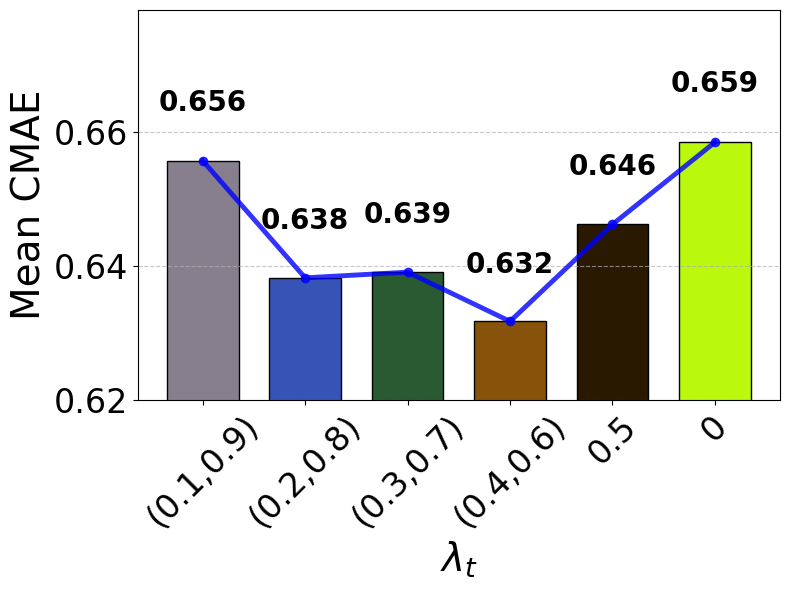

Plot saved as /proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/all_mae/resourceless_performance_comparison_bar_line_lambda.png


In [40]:
def plot_category_comparison(avg_cfeddc_values_01, avg_cfeddc_values_02, avg_cfeddc_values_03, avg_cfeddc_values_04, avg_cfeddc_values_05, 
                             avg_cfeddc_values_06, filename, ylim):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Bar data
    bar_heights = [avg_cfeddc_values_01, avg_cfeddc_values_02, avg_cfeddc_values_03, avg_cfeddc_values_04, avg_cfeddc_values_05, avg_cfeddc_values_06]
    bar_positions = np.arange(len(bar_heights))
    bar_labels = ['(0.1,0.9)', '(0.2,0.8)', '(0.3,0.7)', '(0.4,0.6)', '0.5', '0']

    # Bar plot
    bars = ax.bar(bar_positions, bar_heights,
                  color=["#877f8d", "#3654b5", "#295a32", "#87530a",  "#2a1901",  "#BAF90D"],
                  width=0.7, edgecolor='black')

    # Line connecting mean values
    ax.plot(bar_positions, bar_heights, marker='o', color='blue', linewidth=3.5, label='Mean Line', zorder=3, alpha=0.8)

    # Annotate each bar with its mean value
    for idx, bar in enumerate(bars):
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, h * 1.01,
                f'{h:.3f}', ha='center', va='bottom',
                fontsize=20, fontweight='bold')

    
    ax.set_ylabel('Mean CMAE', fontsize=28)
    ax.set_xlabel('$\lambda_t$', fontsize=28)
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(bar_labels, fontsize=24, rotation=45)
    ax.tick_params(axis='y', labelsize=24)
    ax.set_ylim(ylim, max(bar_heights) * 1.03,)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    # ax.legend()

    plt.tight_layout()
    out_path = os.path.join(output_dir, filename)
    plt.savefig(out_path)
    plt.show()
    print(f"Plot saved as {out_path}")


plot_category_comparison(
    avg_cfeddc_values_01=avg_resourceless_cfeddc_01,
    avg_cfeddc_values_02=avg_resourceless_cfeddc_02,
    avg_cfeddc_values_03=avg_resourceless_cfeddc_03,
    avg_cfeddc_values_04=avg_resourceless_cfeddc_04,
    avg_cfeddc_values_05=avg_resourceless_cfeddc_05,
    avg_cfeddc_values_06=avg_resourceless_cfeddc_06,
    filename='resourceless_performance_comparison_bar_line_lambda.png',
    ylim=0.62
)

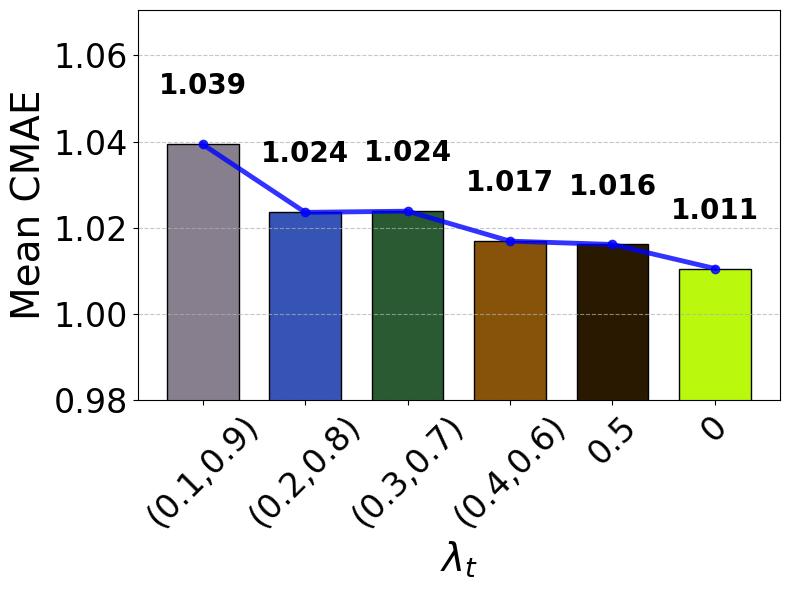

Plot saved as /proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/all_mae/resourceful_performance_comparison_bar_line_lambda.png


In [41]:
plot_category_comparison(
    avg_cfeddc_values_01=avg_resourceful_cfeddc_01,
    avg_cfeddc_values_02=avg_resourceful_cfeddc_02,
    avg_cfeddc_values_03=avg_resourceful_cfeddc_03,
    avg_cfeddc_values_04=avg_resourceful_cfeddc_04,
    avg_cfeddc_values_05=avg_resourceful_cfeddc_05,
    avg_cfeddc_values_06=avg_resourceful_cfeddc_06,
    filename='resourceful_performance_comparison_bar_line_lambda.png',
    ylim=0.98
)

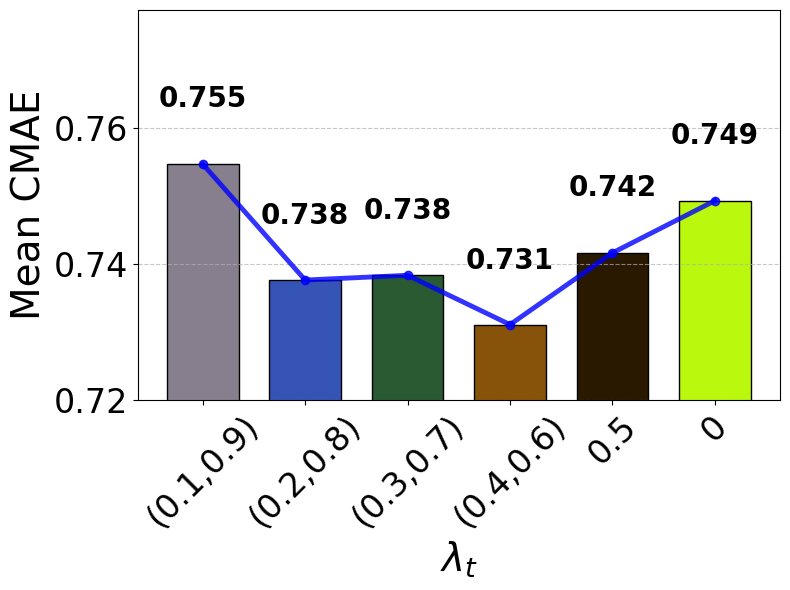

Plot saved as /proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/all_mae/all_performance_comparison_bar_line_lambda.png


In [42]:
plot_category_comparison(
    avg_cfeddc_values_01=avg_all_cfeddc_01,
    avg_cfeddc_values_02=avg_all_cfeddc_02,
    avg_cfeddc_values_03=avg_all_cfeddc_03,
    avg_cfeddc_values_04=avg_all_cfeddc_04,
    avg_cfeddc_values_05=avg_all_cfeddc_05,
    avg_cfeddc_values_06=avg_all_cfeddc_06,
    filename='all_performance_comparison_bar_line_lambda.png',
    ylim=0.72
)

Processing folder: CFedDC_KT_RL_lambda_min_0.1_lambda_max_0.9_kappa_1.0_delta_1.0_100
Processing folder: CFedDC_KT_RL_lambda_min_0.2_lambda_max_0.8_kappa_1.0_delta_1.0_100
Processing folder: CFedDC_KT_RL_lambda_min_0.3_lambda_max_0.7_kappa_1.0_delta_1.0_100
Processing folder: CFedDC_KT_RL_lambda_min_0.4_lambda_max_0.6_kappa_1.0_delta_1.0_100
Processing folder: CFedDC_KT_RL_lambda_min_0.5_lambda_max_0.5_kappa_1.0_delta_1.0_100
Processing folder: CFedDC_KT_RL_no_lambda_kappa_1.0_delta_1.0
Common rounds across folders: 100
Plotting full range: 30 rounds


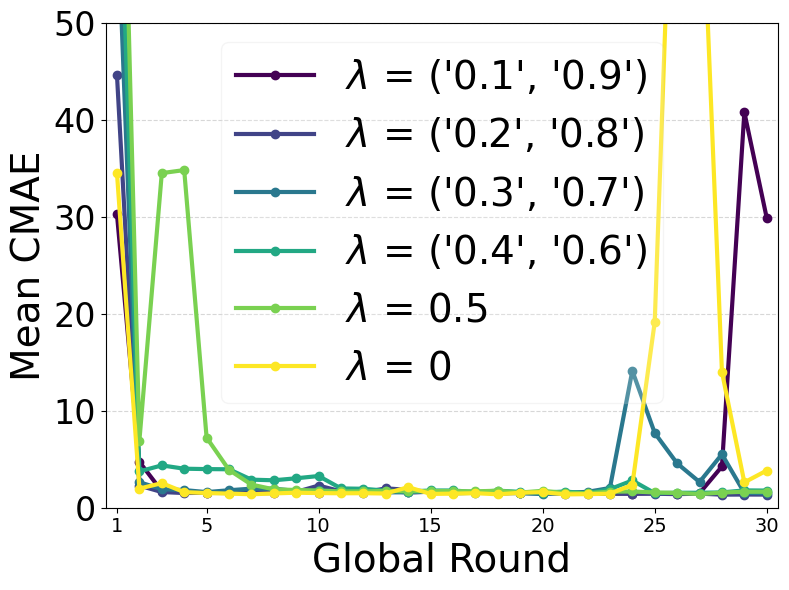

Saved lineplot of average CMAE at:
    /proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/all_mae/all_avg_cmae_CFedDC_lambda_min_max.png


In [51]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset


# ─── CONFIGURATION ────────────────────────────────────────────────────────────
base_dir  = "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2"

folders   = [
    "CFedDC_KT_RL_lambda_min_0.1_lambda_max_0.9_kappa_1.0_delta_1.0_100",
    "CFedDC_KT_RL_lambda_min_0.2_lambda_max_0.8_kappa_1.0_delta_1.0_100",
    "CFedDC_KT_RL_lambda_min_0.3_lambda_max_0.7_kappa_1.0_delta_1.0_100",
    "CFedDC_KT_RL_lambda_min_0.4_lambda_max_0.6_kappa_1.0_delta_1.0_100",
    "CFedDC_KT_RL_lambda_min_0.5_lambda_max_0.5_kappa_1.0_delta_1.0_100",
    "CFedDC_KT_RL_no_lambda_kappa_1.0_delta_1.0"
]


num_users = 535

# ─── STEP 1: COLLECT DATA ──────────────────────────────────────────────────────
cmae_lists = { folder: [] for folder in folders }

for folder in folders:
    print(f"Processing folder: {folder}")
    for user_id in range(num_users):
        filename = f"user_{user_id}_val_round_results.json"
        file_path = os.path.join(base_dir, folder, "local_val", filename)

        if not os.path.exists(file_path):
            continue

        try:
            with open(file_path, "r") as f:
                data = json.load(f)
        except Exception as e:
            print(f"[Warning] Could not read {file_path}: {e}")
            continue

        cmae = data.get("validation_results", {}).get("info_cmae", [])
        if not cmae:
            continue

        cmae_lists[folder].append(cmae)

# ─── STEP 2: ORGANIZE DATA BY ROUND ────────────────────────────────────────────
for folder in folders:
    if len(cmae_lists[folder]) == 0:
        raise RuntimeError(f"No resourceless users found for {folder}.")

max_rounds_per_folder = [max(len(lst) for lst in cmae_lists[folder]) for folder in folders]
common_rounds = min(max_rounds_per_folder)
print(f"Common rounds across folders: {common_rounds}")

plot_rounds = min(common_rounds, 30)
print(f"Plotting full range: {plot_rounds} rounds")

by_round = {}
for folder in folders:
    by_round[folder] = [[] for _ in range(common_rounds)]
    for user_list in cmae_lists[folder]:
        for r in range(len(user_list)):
            if r < common_rounds:
                by_round[folder][r].append(user_list[r])

# ─── STEP 3: PLOT AVERAGE CMAE + STD SHADING ───────────────────────────────────
plt.figure(figsize=(8, 6))

rounds = np.arange(1, plot_rounds + 1)

# Use a nice colormap → Viridis, one color per folder
cmap = plt.get_cmap("viridis")
n = len(folders)
colors = [cmap(i/(n-1)) for i in range(n)]

for idx, folder in enumerate(folders):
    avg_cmae = []
    std_cmae = []
    for r in range(plot_rounds):
        round_values = by_round[folder][r]
        mean_val = np.mean(round_values)
        std_val  = np.std(round_values)
        avg_cmae.append(mean_val)
        std_cmae.append(std_val)

    min_cmae = min(avg_cmae)
    min_round = avg_cmae.index(min_cmae) + 1

    lambda_min = folder.split('_')[5].replace('lambda_min', '')
    lambda_max = folder.split('_')[8].replace('lambda_max', '')
    # print(f"Lambda value: {lambda_val}")


    if folder == folders[5]:
        label = f"$\lambda$ = 0"
    elif folder == folders[4]:
        label = f"$\lambda$ = 0.5"
    else:
        label = f"$\lambda$ = {lambda_min,lambda_max}" # → min CMAE = {min_cmae:.3f} @ round {min_round}"

    # Plot average line
    plt.plot(
        rounds,
        avg_cmae,
        label=label,
        color=colors[idx],
        linewidth=3,
        marker='o', markersize=6
    )

    # Plot std shading
    avg_cmae = np.array(avg_cmae)
    std_cmae = np.array(std_cmae)
    

tick_interval = 5
xtick_positions = np.arange(0, plot_rounds + 1, tick_interval)
if xtick_positions[0] == 0:
    xtick_positions[0] = 1  # start from round 1 instead of 0
plt.xticks(xtick_positions, [str(x) for x in xtick_positions], fontsize=14)
plt.xlim(0.5, plot_rounds + 0.5)

# Labels
plt.xlabel("Global Round", fontsize=28)
plt.ylabel("Mean CMAE", fontsize=28)
plt.yticks(fontsize=24)
plt.ylim(0.0, 50.0)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Legend
plt.legend(fontsize=28, loc='best', frameon=True, framealpha=0.2, ncol=1)


plt.tight_layout()

# Save
save_path = os.path.join(base_dir, "all_mae", "all_avg_cmae_CFedDC_lambda_min_max.png")
os.makedirs(os.path.dirname(save_path), exist_ok=True)
plt.savefig(save_path)
plt.show()
plt.close()

print(f"Saved lineplot of average CMAE at:\n    {save_path}")


Processing folder: CFedDC_KT_RL_lambda_min_0.1_lambda_max_0.9_kappa_1.0_delta_1.0_100
Processing folder: CFedDC_KT_RL_lambda_min_0.2_lambda_max_0.8_kappa_1.0_delta_1.0_100
Processing folder: CFedDC_KT_RL_lambda_min_0.3_lambda_max_0.7_kappa_1.0_delta_1.0_100
Processing folder: CFedDC_KT_RL_lambda_min_0.4_lambda_max_0.6_kappa_1.0_delta_1.0_100
Processing folder: CFedDC_KT_RL_lambda_min_0.5_lambda_max_0.5_kappa_1.0_delta_1.0_100
Processing folder: CFedDC_KT_RL_no_lambda_kappa_1.0_delta_1.0
Common rounds across folders: 100
Plotting full range: 30 rounds


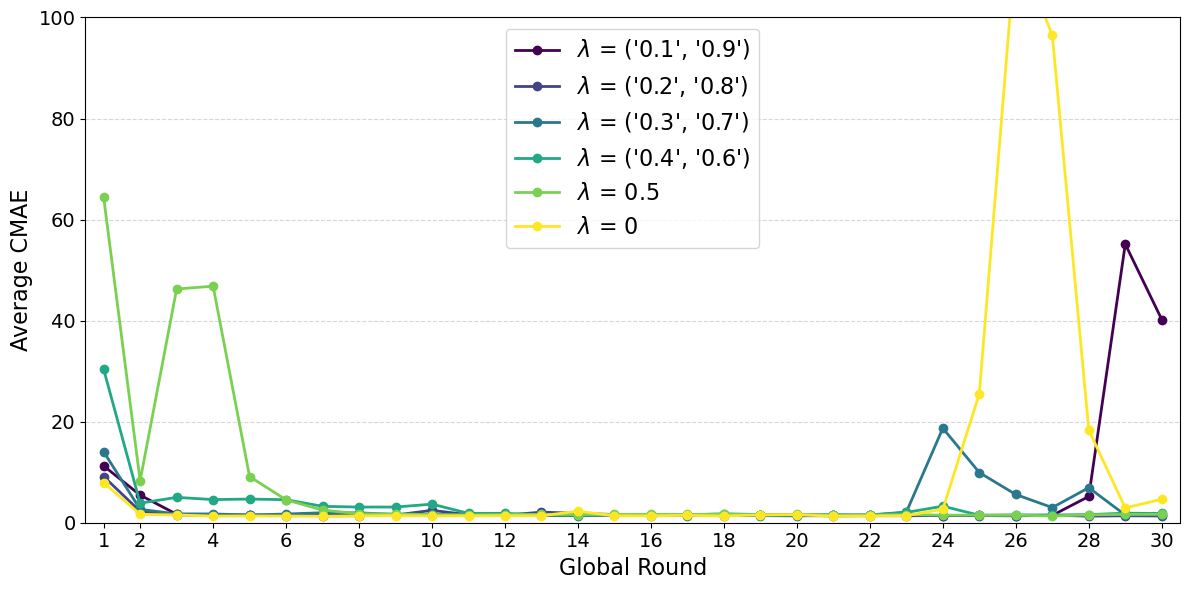

Saved lineplot of average CMAE with std shading (RESOURCELESS ONLY) at:
    /proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/all_mae/resourceless_avg_cmae_CFedDC_lambda_min_max.png


In [30]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ─── CONFIGURATION ────────────────────────────────────────────────────────────
base_dir  = "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2"

folders   = [
    "CFedDC_KT_RL_lambda_min_0.1_lambda_max_0.9_kappa_1.0_delta_1.0_100",
    "CFedDC_KT_RL_lambda_min_0.2_lambda_max_0.8_kappa_1.0_delta_1.0_100",
    "CFedDC_KT_RL_lambda_min_0.3_lambda_max_0.7_kappa_1.0_delta_1.0_100",
    "CFedDC_KT_RL_lambda_min_0.4_lambda_max_0.6_kappa_1.0_delta_1.0_100",
    "CFedDC_KT_RL_lambda_min_0.5_lambda_max_0.5_kappa_1.0_delta_1.0_100",
    "CFedDC_KT_RL_no_lambda_kappa_1.0_delta_1.0"
]


num_users = 535

# ─── STEP 1: COLLECT DATA ──────────────────────────────────────────────────────
cmae_lists = { folder: [] for folder in folders }

for folder in folders:
    print(f"Processing folder: {folder}")
    for user_id in range(num_users):
        filename = f"user_{user_id}_val_round_results.json"
        file_path = os.path.join(base_dir, folder, "local_val", filename)

        if not os.path.exists(file_path):
            continue

        try:
            with open(file_path, "r") as f:
                data = json.load(f)
        except Exception as e:
            print(f"[Warning] Could not read {file_path}: {e}")
            continue

        # RESOURCELESS ONLY
        rc = data.get("resource_category", "Unknown").replace(" user", "").lower()
        if rc != "resourceless":
            continue

        cmae = data.get("validation_results", {}).get("info_cmae", [])
        if not cmae:
            continue

        cmae_lists[folder].append(cmae)

# ─── STEP 2: ORGANIZE DATA BY ROUND ────────────────────────────────────────────
for folder in folders:
    if len(cmae_lists[folder]) == 0:
        raise RuntimeError(f"No resourceless users found for {folder}.")

max_rounds_per_folder = [max(len(lst) for lst in cmae_lists[folder]) for folder in folders]
common_rounds = min(max_rounds_per_folder)
print(f"Common rounds across folders: {common_rounds}")

plot_rounds = min(common_rounds, 30)
print(f"Plotting full range: {plot_rounds} rounds")

by_round = {}
for folder in folders:
    by_round[folder] = [[] for _ in range(common_rounds)]
    for user_list in cmae_lists[folder]:
        for r in range(len(user_list)):
            if r < common_rounds:
                by_round[folder][r].append(user_list[r])

# ─── STEP 3: PLOT AVERAGE CMAE + STD SHADING ───────────────────────────────────
plt.figure(figsize=(12, 6))

rounds = np.arange(1, plot_rounds + 1)

# Use a nice colormap → Viridis, one color per folder
cmap = plt.get_cmap("viridis")
n = len(folders)
colors = [cmap(i/(n-1)) for i in range(n)]

for idx, folder in enumerate(folders):
    avg_cmae = []
    std_cmae = []
    for r in range(plot_rounds):
        round_values = by_round[folder][r]
        mean_val = np.mean(round_values)
        std_val  = np.std(round_values)
        avg_cmae.append(mean_val)
        std_cmae.append(std_val)

    min_cmae = min(avg_cmae)
    min_round = avg_cmae.index(min_cmae) + 1

    lambda_min = folder.split('_')[5].replace('lambda_min', '')
    lambda_max = folder.split('_')[8].replace('lambda_max', '')
    # print(f"Lambda value: {lambda_val}")


    if folder == folders[5]:
        label = f"$\lambda$ = 0"
    elif folder == folders[4]:
        label = f"$\lambda$ = 0.5"
    else:
        label = f"$\lambda$ = {lambda_min,lambda_max}" # → min CMAE = {min_cmae:.3f} @ round {min_round}"

    # Plot average line
    plt.plot(
        rounds,
        avg_cmae,
        label=label,
        color=colors[idx],
        linewidth=2,
        marker='o', markersize=6
    )

    # Plot std shading
    avg_cmae = np.array(avg_cmae)
    std_cmae = np.array(std_cmae)
    """plt.fill_between(
        rounds,
        avg_cmae - std_cmae,
        avg_cmae + std_cmae,
        color=colors[idx],
        alpha=0.2
    )"""

# X-axis
# plt.xticks(rounds, [str(r) for r in rounds], fontsize=14)
tick_interval = 2
xtick_positions = np.arange(0, plot_rounds + 1, tick_interval)
if xtick_positions[0] == 0:
    xtick_positions[0] = 1  # start from round 1 instead of 0
plt.xticks(xtick_positions, [str(x) for x in xtick_positions], fontsize=14)
plt.xlim(0.5, plot_rounds + 0.5)

# Labels
plt.xlabel("Global Round", fontsize=16)
plt.ylabel("Average CMAE", fontsize=16)
plt.yticks(fontsize=14)
plt.ylim(0.0, 100.0)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Legend
plt.legend(fontsize=16, loc="best")

plt.tight_layout()

# Save
save_path = os.path.join(base_dir, "all_mae", "resourceless_avg_cmae_CFedDC_lambda_min_max.png")
os.makedirs(os.path.dirname(save_path), exist_ok=True)
plt.savefig(save_path)
plt.show()
plt.close()

print(f"Saved lineplot of average CMAE with std shading (RESOURCELESS ONLY) at:\n    {save_path}")


Processing folder: CFedDC_KT_RL_lambda_min_0.1_lambda_max_0.9_kappa_1.0_delta_1.0_100
Processing folder: CFedDC_KT_RL_lambda_min_0.2_lambda_max_0.8_kappa_1.0_delta_1.0_100
Processing folder: CFedDC_KT_RL_lambda_min_0.3_lambda_max_0.7_kappa_1.0_delta_1.0_100
Processing folder: CFedDC_KT_RL_lambda_min_0.4_lambda_max_0.6_kappa_1.0_delta_1.0_100
Processing folder: CFedDC_KT_RL_lambda_min_0.5_lambda_max_0.5_kappa_1.0_delta_1.0_100
Processing folder: CFedDC_KT_RL_no_lambda_kappa_1.0_delta_1.0
Common rounds across folders: 100
Plotting full range: 30 rounds


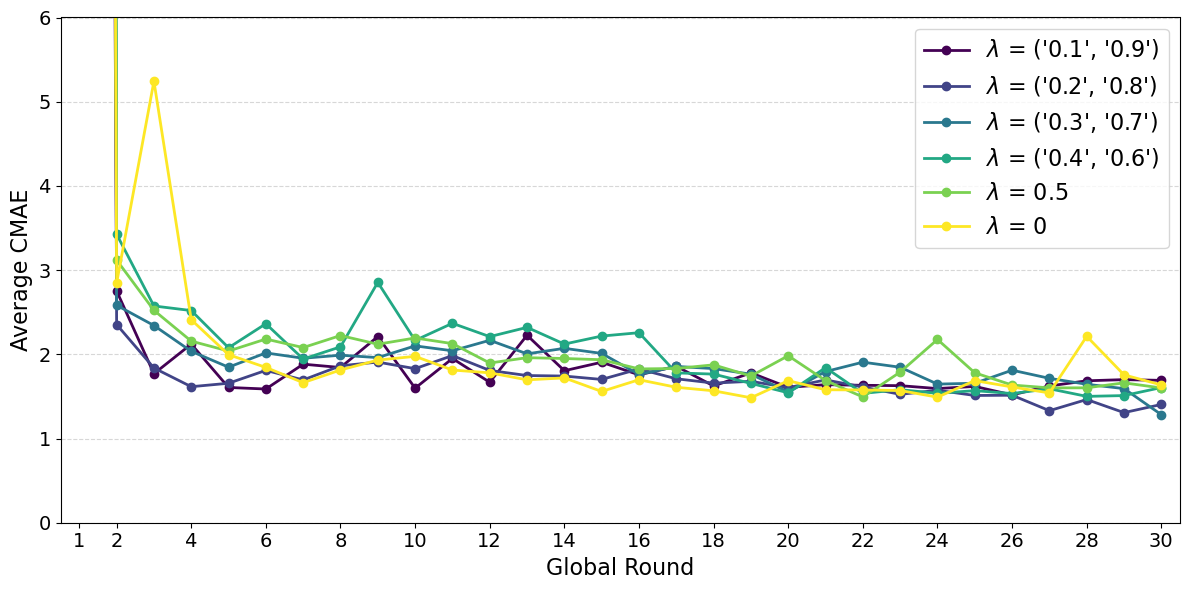

Saved lineplot of CMAE (RESOURCEFUL ONLY) at:
    /proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/all_mae/resourceful_avg_cmae_CFedDC_lambda_min_max.png


In [32]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ─── CONFIGURATION ────────────────────────────────────────────────────────────
base_dir  = "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2"

folders   = [
    "CFedDC_KT_RL_lambda_min_0.1_lambda_max_0.9_kappa_1.0_delta_1.0_100",
    "CFedDC_KT_RL_lambda_min_0.2_lambda_max_0.8_kappa_1.0_delta_1.0_100",
    "CFedDC_KT_RL_lambda_min_0.3_lambda_max_0.7_kappa_1.0_delta_1.0_100",
    "CFedDC_KT_RL_lambda_min_0.4_lambda_max_0.6_kappa_1.0_delta_1.0_100",
    "CFedDC_KT_RL_lambda_min_0.5_lambda_max_0.5_kappa_1.0_delta_1.0_100",
    "CFedDC_KT_RL_no_lambda_kappa_1.0_delta_1.0"

]

num_users = 535

# ─── STEP 1: COLLECT DATA ──────────────────────────────────────────────────────
cmae_lists = { folder: [] for folder in folders }

for folder in folders:
    print(f"Processing folder: {folder}")
    for user_id in range(num_users):
        filename = f"user_{user_id}_val_round_results.json"
        file_path = os.path.join(base_dir, folder, "local_val", filename)
        print
        if not os.path.exists(file_path):
            continue

        try:
            with open(file_path, "r") as f:
                data = json.load(f)
        except Exception as e:
            print(f"[Warning] Could not read {file_path}: {e}")
            continue

        rc = data.get("resource_category", "Unknown").replace(" user", "").lower()
        if rc != "resourceful":
            continue

        cmae = data.get("validation_results", {}).get("info_cmae", [])
        if not cmae:
            continue

        cmae_lists[folder].append(cmae)

# ─── STEP 2: ORGANIZE DATA BY ROUND ────────────────────────────────────────────
for folder in folders:
    if len(cmae_lists[folder]) == 0:
        raise RuntimeError(f"No resourceful users found for {folder}.")

max_rounds_per_folder = [max(len(lst) for lst in cmae_lists[folder]) for folder in folders]
common_rounds = min(max_rounds_per_folder)
print(f"Common rounds across folders: {common_rounds}")

plot_rounds = min(common_rounds, 30)
print(f"Plotting full range: {plot_rounds} rounds")

by_round = {}
for folder in folders:
    by_round[folder] = [[] for _ in range(common_rounds)]
    for user_list in cmae_lists[folder]:
        for r in range(len(user_list)):
            if r < common_rounds:
                by_round[folder][r].append(user_list[r])

# ─── STEP 3: PLOT AVERAGE CMAE + STD SHADING ───────────────────────────────────
plt.figure(figsize=(12, 6))

rounds = np.arange(1, plot_rounds + 1)

# Use a nice colormap → Viridis, one color per folder
cmap = plt.get_cmap("viridis")
n = len(folders)
colors = [cmap(i/(n-1)) for i in range(n)]

for idx, folder in enumerate(folders):
    avg_cmae = []
    std_cmae = []
    for r in range(plot_rounds):
        round_values = by_round[folder][r]
        mean_val = np.mean(round_values)
        std_val  = np.std(round_values)
        avg_cmae.append(mean_val)
        std_cmae.append(std_val)

    min_cmae = min(avg_cmae)
    min_round = avg_cmae.index(min_cmae) + 1

    lambda_min = folder.split('_')[5].replace('lambda_min', '')
    lambda_max = folder.split('_')[8].replace('lambda_max', '')
    if folder == folders[5]:
        label = f"$\lambda$ = 0"
    elif folder == folders[4]:
        label = f"$\lambda$ = 0.5"
    else:
        label = f"$\lambda$ = {lambda_min,lambda_max}" # → min CMAE = {min_cmae:.3f} @ round {min_round}"

    # Plot average line
    plt.plot(
        rounds,
        avg_cmae,
        label=label,
        color=colors[idx],
        linewidth=2,
        marker='o', markersize=6
    )

    # Plot std shading
    avg_cmae = np.array(avg_cmae)
    std_cmae = np.array(std_cmae)
   

# X-axis
# plt.xticks(rounds, [str(r) for r in rounds], fontsize=14)
tick_interval = 2
xtick_positions = np.arange(0, plot_rounds + 1, tick_interval)
if xtick_positions[0] == 0:
    xtick_positions[0] = 1  # start from round 1 instead of 0
plt.xticks(xtick_positions, [str(x) for x in xtick_positions], fontsize=14)
plt.xlim(0.5, plot_rounds + 0.5)

plt.xlim(0.5, plot_rounds + 0.5)

# Labels
plt.xlabel("Global Round", fontsize=16)
plt.ylabel("Average CMAE", fontsize=16)
plt.yticks(fontsize=14)
plt.ylim(0.0, 6.0)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Legend
plt.legend(fontsize=16, loc="best")

plt.tight_layout()

# Save
save_path = os.path.join(base_dir, "all_mae", "resourceful_avg_cmae_CFedDC_lambda_min_max.png")
os.makedirs(os.path.dirname(save_path), exist_ok=True)
plt.savefig(save_path)
plt.show()
plt.close()

print(f"Saved lineplot of CMAE (RESOURCEFUL ONLY) at:\n    {save_path}")
